# Import library

In [1]:
import tensorflow as tf
import numpy as np


In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Import dataset

In [4]:
df =  pd.read_csv('./data.csv', header=0,error_bad_lines=False)
print(df)

                       date symbol  ...        high     volume
0       2016-01-05 00:00:00   WLTW  ...  126.250000  2163600.0
1       2016-01-06 00:00:00   WLTW  ...  125.540001  2386400.0
2       2016-01-07 00:00:00   WLTW  ...  119.739998  2489500.0
3       2016-01-08 00:00:00   WLTW  ...  117.440002  2006300.0
4       2016-01-11 00:00:00   WLTW  ...  117.330002  1408600.0
...                     ...    ...  ...         ...        ...
851259           2016-12-30    ZBH  ...  103.930000   973800.0
851260           2016-12-30   ZION  ...   43.310001  1938100.0
851261           2016-12-30    ZTS  ...   53.740002  1701200.0
851262  2016-12-30 00:00:00    AIV  ...   45.590000  1380900.0
851263  2016-12-30 00:00:00    FTV  ...   54.480000   705100.0

[851264 rows x 7 columns]


In [5]:
df.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [6]:
df.shape

(851264, 7)

Concentrate on Yahoo company 

In [7]:
yahoo = df[df['symbol']=='YHOO']

In [8]:
df['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [9]:
yahoo.head()

,date,symbol,open,close,low,high,volume
713,2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
1181,2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
1649,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2117,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2585,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0


In [10]:
yahoo.tail()

,date,symbol,open,close,low,high,volume
849257,2016-12-23,YHOO,38.459999,38.660000,38.369999,38.810001,3840100.0
849757,2016-12-27,YHOO,38.590000,38.919998,38.500000,39.070000,4240300.0
850257,2016-12-28,YHOO,39.119999,38.730000,38.709999,39.220001,4393500.0
850757,2016-12-29,YHOO,38.759998,38.639999,38.480000,38.930000,4170200.0
851257,2016-12-30,YHOO,38.720001,38.669998,38.430000,39.000000,6431600.0


In [11]:
yahoo.dateBis= pd.to_datetime(yahoo.date, format='%Y/%m/%d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [12]:
yahoo_stock_prices = yahoo.values[:,-2].astype('float32')

In [13]:
yahoo_stock_prices

array([17.2 , 17.23, 17.3 , ..., 39.22, 38.93, 39.  ], dtype=float32)

In [14]:
yahoo_stock_prices.shape

(1762,)

In [15]:
yahoo_stock_prices = yahoo_stock_prices.reshape(yahoo_stock_prices.shape[0], 1)

In [16]:
yahoo_stock_prices.shape

(1762, 1)

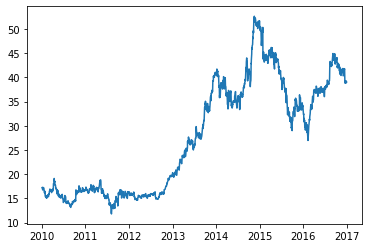

In [17]:
plt.plot(yahoo.dateBis,yahoo_stock_prices)

We see that the price of Yahoo rised a lot espacially in 2015

## Divinding into train and test variables

In [18]:
len(yahoo_stock_prices)

1762

In [19]:
train_size= int(len(yahoo_stock_prices)*0.8)

In [20]:
train,test= yahoo_stock_prices[:train_size,:],yahoo_stock_prices[train_size:,:] 

In [21]:
train.shape,test.shape

((1409, 1), (353, 1))

## Making vary the look_back parameter

In [22]:
train[10:(10+2),0]

array([16.96, 16.68], dtype=float32)

In [23]:
train[9:(9+2),0]

array([17.25, 16.96], dtype=float32)

In [24]:
def create_dataset(dataset, look_back):
  dataX,dataY=[],[]
  for i in range(len(dataset)-look_back):
    pre_Xtrain= dataset[i:(i+look_back),0]
    dataX.append(pre_Xtrain)
    dataY.append(dataset[i+look_back,0])
  return np.array(dataX),np.array(dataY)

In [25]:
look_back=2
X_train,y_train=create_dataset(train,look_back)
X_test,y_test=create_dataset(test,look_back)


In [26]:

print('variables préliminaires',X_train[0])
print('variable à prédire',y_train[0])
print('variables préliminaires',X_train[1])
print('variable à prédire',y_train[1])
print('Forme de la structure préliminaire pour entrainer',X_train.shape)
print('Forme de la structure prédite pour entrainer',y_train.shape)
print('Forme de la structure préliminaire pour tester',X_test.shape)
print('Forme de la structure prédite pour tester',y_test.shape)

variables préliminaires [17.2  17.23]
variable à prédire 17.3
variables préliminaires [17.23 17.3 ]
variable à prédire 16.9
Forme de la structure préliminaire pour entrainer (1407, 2)
Forme de la structure prédite pour entrainer (1407,)
Forme de la structure préliminaire pour tester (351, 2)
Forme de la structure prédite pour tester (351,)


Reshape les données en array d'array

In [27]:
X_train=np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [28]:
print('Forme de la structure préliminaire pour entrainer',X_train.shape)
print('Forme de la structure prédite pour entrainer',y_train.shape)
print('Forme de la structure préliminaire pour tester',X_test.shape)
print('Forme de la structure prédite pour tester',y_test.shape)

Forme de la structure préliminaire pour entrainer (1407, 1, 2)
Forme de la structure prédite pour entrainer (1407,)
Forme de la structure préliminaire pour tester (351, 1, 2)
Forme de la structure prédite pour tester (351,)


#Create a neural network

In [29]:
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
import time 

In [30]:
model = Sequential()
model.add(LSTM(input_dim=2, units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=2, activation ='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 50)          10600     
_________________________________________________________________
dropout (Dropout)            (None, None, 50)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 202       
Total params: 71,202
Trainable params: 71,202
Non-trainable params: 0
_________________________________________________________________


Optimizers : rmsprop and loss func : mse

In [31]:
model.compile(loss='mse', optimizer='rmsprop')
model.fit(X_train,y_train,batch_size=128,epochs=70,validation_split=0.05)

Epoch 1/70
11/11 [==============================] - 34s 81ms/step - loss: 697.4490 - val_loss: 1619.5389
Epoch 2/70
11/11 [==============================] - 0s 7ms/step - loss: 664.9752 - val_loss: 1488.6970
Epoch 3/70
11/11 [==============================] - 0s 6ms/step - loss: 591.2825 - val_loss: 1313.1537
Epoch 4/70
11/11 [==============================] - 0s 7ms/step - loss: 490.2837 - val_loss: 1152.2885
Epoch 5/70
11/11 [==============================] - 0s 6ms/step - loss: 412.6113 - val_loss: 1029.1167
Epoch 6/70
11/11 [==============================] - 0s 7ms/step - loss: 364.5175 - val_loss: 934.5044
Epoch 7/70
11/11 [==============================] - 0s 7ms/step - loss: 309.6114 - val_loss: 860.2890
Epoch 8/70
11/11 [==============================] - 0s 7ms/step - loss: 284.1501 - val_loss: 798.5508
Epoch 9/70
11/11 [==============================] - 0s 7ms/step - loss: 249.2788 - val_loss: 743.5483
Epoch 10/70
11/11 [==============================] - 0s 7ms/step - loss: 24

#Prediction

In [32]:
prediction = model.predict(X_test)

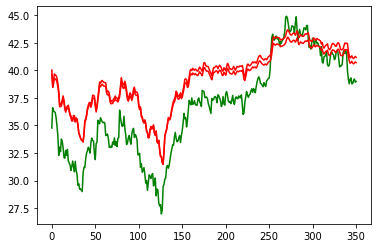

In [33]:
plt.plot(y_test,label='reel',color='green')
plt.plot(prediction,label='prediction',color='red')

The prediction is pretty good except for the end of the prediction which has a little bias

<br><br><br>
#GRU

In [147]:
from tensorflow.keras.optimizers import RMSprop 
  
from tensorflow.keras.callbacks import LambdaCallback 
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.callbacks import ReduceLROnPlateau 
import random 
import sys

##Poem importation

In [148]:
with open('poems.txt', 'r') as file: 
	text = file.read() 
print(text)

﻿Buffalo Bill’s
defunct
who used to
ride a watersmooth-silver
stallion
and break one two three four five pigeons just like that
Jesus

he was a handsome man
and what i want to know is
how do you like your blueeyed boy
Mister Death

Had I the heaven’s embroidered cloths,
Enwrought with golden and silver light,
The blue and the dim and the dark cloths
Of night and light and the half-light,
I would spread the cloths under your feet:
But I, being poor, have only my dreams;
I have spread my dreams under your feet;
Tread softly because you tread on my dreams.

He clasps the crag with crooked hands;
Close to the sun in lonely lands,
Ring’d with the azure world, he stands.

The wrinkled sea beneath him crawls;
He watches from his mountain walls,
And like a thunderbolt he falls.

Some say the world will end in fire,
Some say in ice.
From what I’ve tasted of desire
I hold with those who favor fire.
But if it had to perish twice,
I think I know enough of hate
To say that for destruction ice
Is al

In [151]:
vocabulary = sorted(list(set(text))) 

char_to_indices = dict((c, i) for i, c in enumerate(vocabulary)) 
indices_to_char = dict((i, c) for i, c in enumerate(vocabulary)) 

print(vocabulary)
print(char_to_indices)
print(indices_to_char)

['\n', ' ', '!', ',', '-', '.', ':', ';', 'A', 'B', 'C', 'D', 'E', 'F', 'H', 'I', 'J', 'M', 'O', 'R', 'S', 'T', 'Y', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'y', 'z', '—', '’', '\ufeff']
{'\n': 0, ' ': 1, '!': 2, ',': 3, '-': 4, '.': 5, ':': 6, ';': 7, 'A': 8, 'B': 9, 'C': 10, 'D': 11, 'E': 12, 'F': 13, 'H': 14, 'I': 15, 'J': 16, 'M': 17, 'O': 18, 'R': 19, 'S': 20, 'T': 21, 'Y': 22, 'a': 23, 'b': 24, 'c': 25, 'd': 26, 'e': 27, 'f': 28, 'g': 29, 'h': 30, 'i': 31, 'j': 32, 'k': 33, 'l': 34, 'm': 35, 'n': 36, 'o': 37, 'p': 38, 'q': 39, 'r': 40, 's': 41, 't': 42, 'u': 43, 'v': 44, 'w': 45, 'y': 46, 'z': 47, '—': 48, '’': 49, '\ufeff': 50}
{0: '\n', 1: ' ', 2: '!', 3: ',', 4: '-', 5: '.', 6: ':', 7: ';', 8: 'A', 9: 'B', 10: 'C', 11: 'D', 12: 'E', 13: 'F', 14: 'H', 15: 'I', 16: 'J', 17: 'M', 18: 'O', 19: 'R', 20: 'S', 21: 'T', 22: 'Y', 23: 'a', 24: 'b', 25: 'c', 26: 'd', 27: 'e', 28: 'f', 29: 'g', 30: 'h', 31: 'i', 32

Split the data into subsequences

In [152]:
max_length = 100
steps = 5
sentences = [] 
next_chars = [] 
for i in range(0, len(text) - max_length, steps): 
  sentences.append(text[i: i + max_length]) 
  next_chars.append(text[i + max_length])

In [154]:
print(sentences)
print(next_chars)

['\ufeffBuffalo Bill’s\ndefunct\nwho used to\nride a watersmooth-silver\nstallion\nand break one two three four ', 'alo Bill’s\ndefunct\nwho used to\nride a watersmooth-silver\nstallion\nand break one two three four five ', 'ill’s\ndefunct\nwho used to\nride a watersmooth-silver\nstallion\nand break one two three four five pigeo', '\ndefunct\nwho used to\nride a watersmooth-silver\nstallion\nand break one two three four five pigeons ju', 'nct\nwho used to\nride a watersmooth-silver\nstallion\nand break one two three four five pigeons just li', 'ho used to\nride a watersmooth-silver\nstallion\nand break one two three four five pigeons just like th', 'ed to\nride a watersmooth-silver\nstallion\nand break one two three four five pigeons just like that\nJe', '\nride a watersmooth-silver\nstallion\nand break one two three four five pigeons just like that\nJesus\n\n', ' a watersmooth-silver\nstallion\nand break one two three four five pigeons just like that\nJesus\n\nhe wa', 'tersmooth-silve

Encoding

In [155]:
X = np.zeros((len(sentences), max_length, len(vocabulary)), dtype = np.bool) 
y = np.zeros((len(sentences), len(vocabulary)), dtype = np.bool) 

In [163]:
for i, sentence in enumerate(sentences): 
	for t, char in enumerate(sentence): 
		X[i, t, char_to_indices[char]] = 1
	y[i, char_to_indices[next_chars[i]]] = 1

In [169]:
print(X.shape)
print(y.shape)

(332, 100, 51)
(332, 51)


In [170]:
from tensorflow.keras.layers import GRU 

 
model = Sequential() 

model.add(GRU(128, input_shape =(max_length, len(vocabulary)))) 

model.add(Dense(len(vocabulary))) 
 
model.add(Activation('softmax')) 

optimizer = RMSprop(lr = 0.01) 

model.compile(loss ='categorical_crossentropy', optimizer = optimizer)


model.fit(X, y, batch_size = 128, epochs = 30)#, callbacks = callbacks)

Epoch 1/30
3/3 [==============================] - 1s 14ms/step - loss: 3.9380
Epoch 2/30
3/3 [==============================] - 0s 13ms/step - loss: 4.0360
Epoch 3/30
3/3 [==============================] - 0s 13ms/step - loss: 2.7955
Epoch 4/30
3/3 [==============================] - 0s 13ms/step - loss: 2.6232
Epoch 5/30
3/3 [==============================] - 0s 11ms/step - loss: 2.4193
Epoch 6/30
3/3 [==============================] - 0s 11ms/step - loss: 2.2544
Epoch 7/30
3/3 [==============================] - 0s 11ms/step - loss: 2.1518
Epoch 8/30
3/3 [==============================] - 0s 11ms/step - loss: 2.0135
Epoch 9/30
3/3 [==============================] - 0s 12ms/step - loss: 1.7322
Epoch 10/30
3/3 [==============================] - 0s 10ms/step - loss: 1.6210
Epoch 11/30
3/3 [==============================] - 0s 10ms/step - loss: 1.6856
Epoch 12/30
3/3 [==============================] - 0s 12ms/step - loss: 1.4361
Epoch 13/30
3/3 [==============================] - 0s 11ms/st

In [172]:
def prob_character(preds, freedom = 1.0): 
	preds = np.asarray(preds).astype('float64') 
	# Normalize 
	preds = np.log(preds) / freedom 
	exp_preds = np.exp(preds) 
	preds = exp_preds / np.sum(exp_preds) 
	probas = np.random.multinomial(1, preds, 1) 
	return np.argmax(probas)

In [181]:
def generate_text(length, diversity): 
	start = random.randint(0, len(text) - max_length - 1) 
	res = '' 
	sentence = text[start: start + max_length] 
	res += sentence 
	for i in range(length): 

			x_pred = np.zeros((1, max_length, len(vocabulary))) 
			for t, char in enumerate(sentence): 
				x_pred[0, t, char_to_indices[char]] = 1.
			preds = model.predict(x_pred, verbose = 0)[0] 
      #get the highest proba of char
			next_index = prob_character(preds, diversity) 
			# Matching the indice to the char to get the character
			nextChar = indices_to_char[next_index] 
			# appending next char to the res 
			res += nextChar 
			sentence = sentence[1:] + nextChar 
	return res

print(generate_text(300, 0.2))


 your blueeyed boy
Mister Death

Had I the heaven’s embroidered cloths,
Enwrought with golden and sisve tlind thind thind thind thind thiro thave plssund thind thind thind thind thiro thave plssund thind thind thind thind thire camero wand thind thind thind thind thind thiro thave plssund thind thind thind thind thind thind thind thind thind thind thind thind thire.

Twwwroally land thind thind th


In [174]:
random.randint(0, len(text) - max_length - 1) 

1649

In [178]:
len(np.zeros((1, max_length, len(vocabulary)))[0])

100

In [179]:
max_length

100